In [1]:
import pandas as pd
import sqlite3
from datetime import datetime
import os
import sys
from collections import OrderedDict
import numpy as np

In [2]:
MET_res = "/home/cap/Downloads/MET_RESULTS"
all_results = os.listdir(MET_res)
results = OrderedDict()
for f in all_results:
    
    if f.endswith("_cts.txt"):
        read_date = f.split("_")[3]
        results[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    elif f.endswith(".nc"):
        ncfile = f
    

In [3]:
len(results.keys())


31

#### PODY: is the probabily of detection. It  is the hit rate (HR)
####  POFS is the probabiliy of false detection. It is the false alarm rate (FAR)
#### ACC is the  accuracy

In [4]:
#PODY: is the probabily of detection. IT is the false alarm rate
# 
pod_cols = [col for col in results["20150507"].columns if "POD" in col]
pof_cols = [col for col in results["20150507"].columns if "POF" in col]
acc_cols = [col for col in results["20150507"].columns if "ACC" in col]
fss_cols = [col for col in results["20150507"].columns if "FSS" in col]

In [5]:
pod_cols

['PODY',
 'PODY_NCL',
 'PODY_NCU',
 'PODY_BCL',
 'PODY_BCU',
 'PODN',
 'PODN_NCL',
 'PODN_NCU',
 'PODN_BCL',
 'PODN_BCU']

In [6]:
pof_cols

['POFD', 'POFD_NCL', 'POFD_NCU', 'POFD_BCL', 'POFD_BCU']

In [7]:
acc_cols

['ACC', 'ACC_NCL', 'ACC_NCU', 'ACC_BCL', 'ACC_BCU']

In [8]:
fss_cols

[]

In [9]:
results["20150501"][['FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',"PODY","VX_MASK"]]

,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END,OBS_LEAD,OBS_VALID_BEG,OBS_VALID_END,PODY,VX_MASK
0,0,20150501_000000,20150501_000000,0,20150501_000000,20150501_000000,0.98037,FULL
1,0,20150501_000000,20150501_000000,0,20150501_000000,20150501_000000,0.98115,GREENLAND_WEST_SECTION
2,0,20150501_000000,20150501_000000,0,20150501_000000,20150501_000000,NaN,NUUK


In [10]:
results["20150501"]["VX_MASK"]

0                      FULL
1    GREENLAND_WEST_SECTION
2                      NUUK
Name: VX_MASK, dtype: object

### Collect the values for all dates and take the PODY


In [59]:
REGION = "GREENLAND_WEST_SECTION"
REGION = "FULL"

hit_dict=OrderedDict()

for label in ["datetime","hit_rate"]:
    hit_dict[label] = []
for key_date in results.keys():
    df_sel = results[key_date][results[key_date]["VX_MASK"]  == REGION]
    hit_dict["hit_rate"].append(df_sel["PODY"].values[0])
    hit_dict["datetime"].append(datetime.strptime(df_sel["FCST_VALID_BEG"].values[0],"%Y%m%d_%H%M%S"))

### find fraction skill score

In [60]:
fss_files=OrderedDict()
for f in all_results:
    
    if f.endswith("_nbrcnt.txt"):
        read_date = f.split("_")[3]
        fss_files[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    
    

In [61]:
fss_files.keys()

odict_keys(['20150525', '20150521', '20150507', '20150516', '20150504', '20150527', '20150514', '20150522', '20150503', '20150526', '20150513', '20150512', '20150515', '20150529', '20150506', '20150518', '20150531', '20150510', '20150523', '20150502', '20150505', '20150509', '20150528', '20150519', '20150501', '20150517', '20150530', '20150511', '20150520', '20150508', '20150524'])

In [62]:
# other columns
fss_files["20150525"].columns

Index(['VERSION', 'MODEL', 'DESC', 'FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',
       'FCST_VAR', 'FCST_UNITS', 'FCST_LEV', 'OBS_VAR', 'OBS_UNITS', 'OBS_LEV',
       'OBTYPE', 'VX_MASK', 'INTERP_MTHD', 'INTERP_PNTS', 'FCST_THRESH',
       'OBS_THRESH', 'COV_THRESH', 'ALPHA', 'LINE_TYPE', 'TOTAL', 'FBS',
       'FBS_BCL', 'FBS_BCU', 'FSS', 'FSS_BCL', 'FSS_BCU', 'AFSS', 'AFSS_BCL',
       'AFSS_BCU', 'UFSS', 'UFSS_BCL', 'UFSS_BCU', 'F_RATE', 'F_RATE_BCL',
       'F_RATE_BCU', 'O_RATE', 'O_RATE_BCL', 'O_RATE_BCU'],
      dtype='object')

In [63]:
fss_files["20150525"][["VX_MASK","INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

,VX_MASK,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,FULL,1,0.93752,0,20150525_000000,20150525_000000
1,GREENLAND_WEST_SECTION,1,0.76869,0,20150525_000000,20150525_000000
2,NUUK,1,NaN,0,20150525_000000,20150525_000000
3,FULL,9,0.97456,0,20150525_000000,20150525_000000
4,GREENLAND_WEST_SECTION,9,0.85325,0,20150525_000000,20150525_000000
5,FULL,25,0.98315,0,20150525_000000,20150525_000000
6,GREENLAND_WEST_SECTION,25,0.88812,0,20150525_000000,20150525_000000
7,FULL,49,0.98799,0,20150525_000000,20150525_000000
8,GREENLAND_WEST_SECTION,49,0.92366,0,20150525_000000,20150525_000000


In [64]:
fss_cols = [col for col in fss_files["20150501"].columns if "FSS" in col]
fss_cols

['FSS',
 'FSS_BCL',
 'FSS_BCU',
 'AFSS',
 'AFSS_BCL',
 'AFSS_BCU',
 'UFSS',
 'UFSS_BCL',
 'UFSS_BCU']

In [65]:
fss_files["20150521"][["FSS"]]

,FSS
0,0.93760
1,0.86881
2,0.00000
3,0.97587
4,0.95556
5,0.98604
6,0.97271
7,0.99190
8,0.97875


### Plot the FSS for a given domain

In [66]:
date_sel = "20150525"
get_fss_all = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "FULL"]
get_fss_gr = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "GREENLAND_WEST_SECTION"]

fss_all = get_fss_all[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

In [67]:
fss_all

,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,1,0.93752,0,20150525_000000,20150525_000000
3,9,0.97456,0,20150525_000000,20150525_000000
5,25,0.98315,0,20150525_000000,20150525_000000
7,49,0.98799,0,20150525_000000,20150525_000000


In [68]:
fss_gr = get_fss_gr[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]
fss_gr

,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
1,1,0.76869,0,20150525_000000,20150525_000000
4,9,0.85325,0,20150525_000000,20150525_000000
6,25,0.88812,0,20150525_000000,20150525_000000
8,49,0.92366,0,20150525_000000,20150525_000000


In [69]:
for _,r in fss_gr.iterrows():
    print(r["FSS"])

0.76869
0.85325
0.88812
0.92366


In [70]:
df_fss_full = pd.DataFrame(columns=["date","points","fss"])
df_fss_gr = pd.DataFrame(columns=["date","points","fss"])


In [71]:
for key in fss_files:
    data = fss_files[key][fss_files[key]["VX_MASK"] == "FULL"]
    for _,r in data.iterrows():
        conv_date = datetime.strptime(r["FCST_VALID_BEG"],"%Y%m%d_%H%M%S")
        data_row = pd.DataFrame({"date":[conv_date],"points":[r["INTERP_PNTS"]],"fss":[r["FSS"]]},columns=["date","points","fss"])
        df_fss_full=pd.concat([df_fss_full,data_row],ignore_index=True)

for key in fss_files:
    data = fss_files[key][fss_files[key]["VX_MASK"] == "GREENLAND_WEST_SECTION"]
    for _,r in data.iterrows():
        conv_date = datetime.strptime(r["FCST_VALID_BEG"],"%Y%m%d_%H%M%S")
        data_row = pd.DataFrame({"date":[conv_date],"points":[r["INTERP_PNTS"]],"fss":[r["FSS"]]},columns=["date","points","fss"])
        df_fss_gr=pd.concat([df_fss_gr,data_row],ignore_index=True)

/tmp/ipykernel_158297/1977780816.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fss_full=pd.concat([df_fss_full,data_row],ignore_index=True)
/tmp/ipykernel_158297/1977780816.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fss_gr=pd.concat([df_fss_gr,data_row],ignore_index=True)


In [72]:
df_fss_full.dtypes

date      datetime64[ns]
points            object
fss              float64
dtype: object

In [73]:
df_fss_full["day"] = df_fss_full["date"].dt.strftime('%Y-%m-%d')

In [74]:
df_fss_full.dtypes

date      datetime64[ns]
points            object
fss              float64
day               object
dtype: object

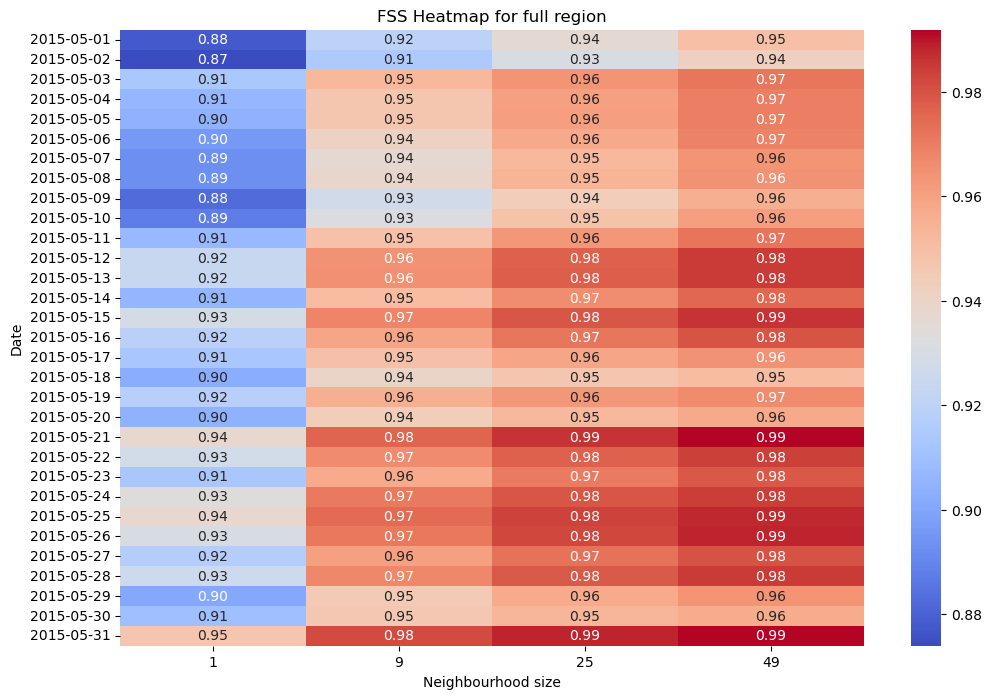

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = "viridis"
cmap = "coolwarm"
pivot_df = df_fss_full.pivot(index='day', columns='points', values='fss')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=cmap)

plt.title(f'FSS Heatmap for full region')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')

plt.show()

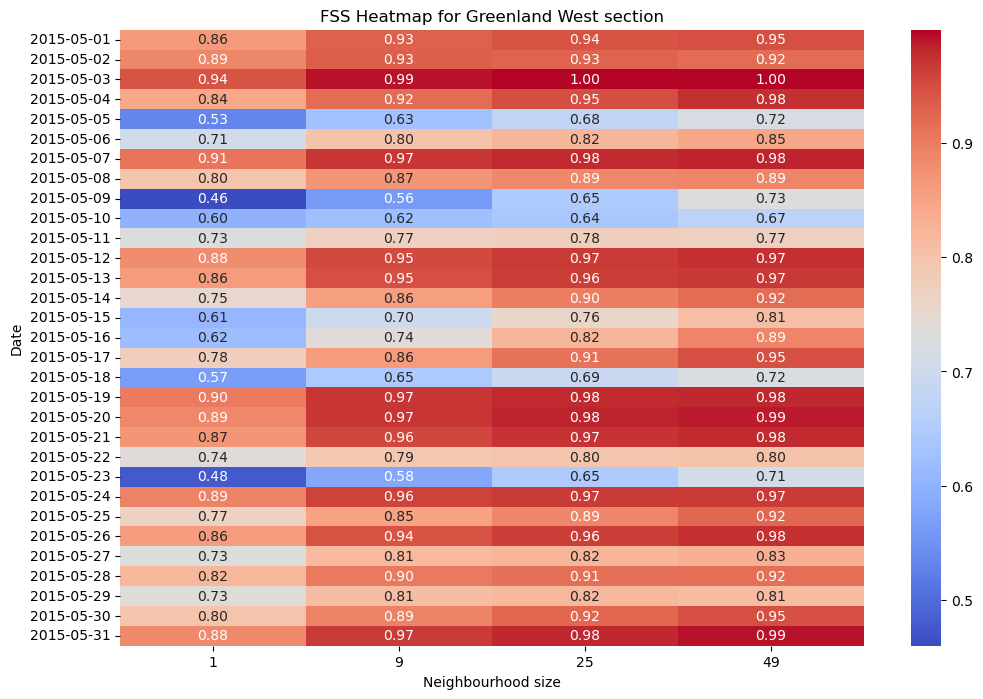

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
df_fss_gr["day"] = df_fss_gr["date"].dt.strftime('%Y-%m-%d')
pivot_df = df_fss_gr.pivot(index='day', columns='points', values='fss')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=cmap)

plt.title('FSS Heatmap for Greenland West section')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')

plt.show()